In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from tqdm import tqdm
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('../data/statcast_04_04_2022_10_03_2022.csv')
print(df.columns)
print(df.shape)

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [5]:
# filter columns
df['team'] = [row['away_team'] if row['inning_topbot'] == 'Top' else row['home_team'] for index,row in df.iterrows()]
columns = ['game_date', 'release_speed', 'pitch_name', 'plate_x', 'plate_z', 'team']
filtered = df[columns]
# avg_pitch_speeds = df.groupby('pitch_name').mean()['release_speed'].reset_index()
# filtered.merge(avg_pitch_speeds, on = 'pitch_name')
filtered.sample(175000).to_csv('../data/hypothesis_1_20221109_sample20perc.csv', index = False)
only_strikes = df[df.description == 'called_strike']
print('min x: ',only_strikes.plate_x.min(), '|', 'max x: ', only_strikes.plate_x.max())
print('min z: ', only_strikes.plate_z.min(), '|', 'max z: ', only_strikes.plate_z.max())
filtered


min x:  -1.42 | max x:  1.35
min z:  0.39 | max z:  4.56


,game_date,release_speed,pitch_name,plate_x,plate_z,team
0,2022-10-02,93.5,4-Seam Fastball,-0.76,3.38,TEX
1,2022-10-02,80.9,Curveball,-0.66,0.49,TEX
2,2022-10-02,92.3,4-Seam Fastball,-0.20,3.12,TEX
3,2022-10-02,94.3,4-Seam Fastball,0.53,3.69,TEX
4,2022-10-02,93.4,4-Seam Fastball,-0.62,2.19,TEX
...,...,...,...,...,...,...
695191,2022-04-07,91.8,Split-Finger,-0.89,2.05,HOU
695192,2022-04-07,86.9,Slider,-0.64,1.74,HOU
695193,2022-04-07,99.2,4-Seam Fastball,1.53,1.84,HOU
695194,2022-04-07,97.9,4-Seam Fastball,-0.62,2.01,HOU


In [12]:
# filter columns
columns = ['game_date', 'home_team', 'away_team', 'release_speed',
       'inning_topbot', 'pitch_name',
       'plate_x', 'plate_z', 'description']
filtered = df[columns]
# avg_pitch_speeds = df.groupby('pitch_name').mean()['release_speed'].reset_index()
# filtered.merge(avg_pitch_speeds, on = 'pitch_name')
# filtered.to_csv('../data/hypothesis_1_20221108.csv', index = False)
filtered.descri

/Users/dimitriospsaltos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Index(['game_date', 'home_team', 'away_team', 'release_speed', 'outs_when_up',
       'inning', 'inning_topbot', 'pitch_name', 'pitch_type', 'plate_x',
       'plate_z'],
      dtype='object')


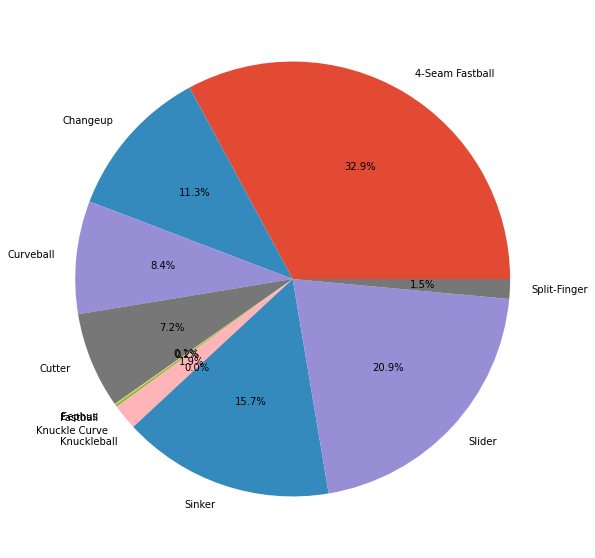

In [5]:
plt.figure(figsize=(10,10))
plt.pie(filtered.groupby(['pitch_name']).count()['pitch_type'].reset_index()['pitch_type'], 
       labels = filtered.groupby(['pitch_name']).count()['pitch_type'].reset_index()['pitch_name'],
       autopct='%1.1f%%')
plt.show()

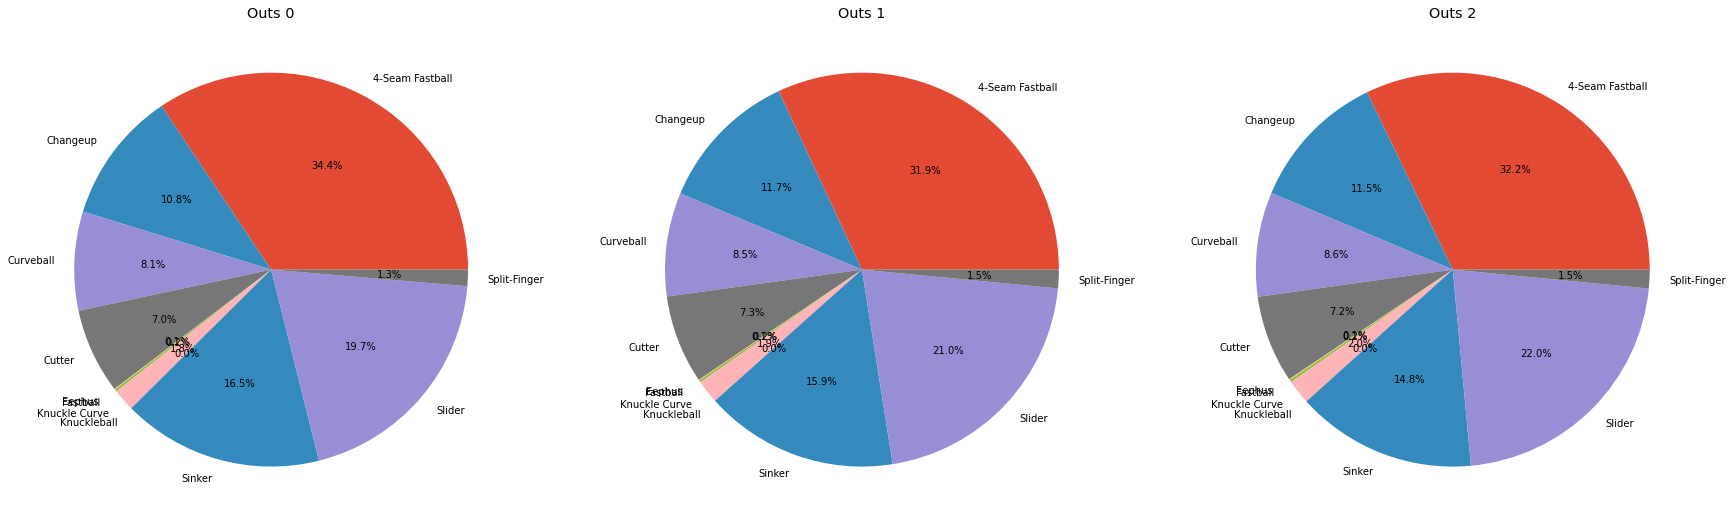

In [27]:
plt.figure(figsize=(30,10))
pie_groups = filtered.groupby(['outs_when_up', 'pitch_name']).count()['pitch_type'].reset_index()
for o in pie_groups.outs_when_up.unique():
    plt.subplot(int('13{}'.format(int(o) + 1)))
    sub_group = pie_groups[pie_groups.outs_when_up == o]
    plt.pie(sub_group.pitch_type,
           labels = sub_group['pitch_name'],
           autopct='%1.1f%%')
    plt.title('Outs {}'.format(o))

plt.show()